In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import autograd.numpy as npa
from autograd import grad, value_and_grad

import legume
from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice
from legume.minimize import Minimize

%load_ext autoreload
%autoreload 2

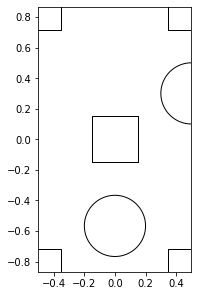

In [2]:
# Initialize a lattice (can be 'square', 'hexagonal', or defined by primitive vectors)
lattice = legume.Lattice('hexagonal')

# Initialize a layer with background permittivity 2
layer = legume.ShapesLayer(lattice, eps_b=2)

# Create a square and use the `add_shape` method to add it to the layer
square = legume.Square(eps=10, x_cent=0, y_cent=0, a=0.3)
layer.add_shape(square)

# Create a circle and also add it to the layer
circle = legume.Circle(eps=6, x_cent=0.5, y_cent=0.3, r=0.2)
layer.add_shape(circle)

# Use an in-built visualization method to plot the contours of the shapes we have so far
legume.viz.shapes(layer)

In [3]:
# PhC parameters
ra = 0.2     # pillar radius
eps_b = 1    # background permittivity
eps_c = 9    # pillar permittivity

# plane-wave expansion parameters
gmax = 2     # truncation of the plane-wave basis
Ny = 14      # Number of rows in the y-direction
Ny_opt = 3   # Number of rows in which the pillars will be modified
Nx = 5       # Supercell size in the x-direction

# Initialize a rectangular lattice
lattice = Lattice([Nx, 0], [0, Ny*np.sqrt(3)/2])

def wg_sc(dx, dy, dr):
    """Define the photonic crystal waveguide given shift parameters
    dx, dy, and dr, for the 2*Nx*Ny_opt number of pillars that get shifted
    """
    # Initialize a layer and the positions of the pillars for the regular waveguide
    layer_wg = ShapesLayer(lattice, eps_b=eps_b)
    xc = []; yc = []
    for ih in range(Ny):
        if ih != Ny//2:
            for ix in range(-Nx//2+1, Nx//2+1):
                xc.append((ih%2)*0.5 + ix)
                yc.append((-Ny//2 + ih)*np.sqrt(3)/2)

    # Add all the pillars, taking care of the shifts
    for ih in range(1, Ny//2+1):
        nx1 = (Ny//2+ih-1)
        nx2 = (Ny//2-ih)
        if ih <= Ny_opt:
            # The ih row includes "optimization" pillars
            for ix in range(Nx):
                circ = Circle(x_cent=xc[nx1*Nx + ix] + dx[(ih-1)*Nx + ix],
                              y_cent=yc[nx1*Nx + ix] + dy[(ih-1)*Nx  + ix],
                              r = ra + dr[(ih-1)*Nx + ix], eps=eps_c)
                layer_wg.add_shape(circ)
                circ = Circle(x_cent=xc[nx2*Nx + ix] + dx[(ih-1+Ny_opt)*Nx  + ix],
                              y_cent=yc[nx2*Nx + ix] + dy[(ih-1+Ny_opt)*Nx  + ix],
                              r = ra + dr[(ih-1+Ny_opt)*Nx + ix], eps=eps_c)
                layer_wg.add_shape(circ)
        else:
            # The ih row includes just regular pillars
            for ix in range(Nx):
                circ = Circle(x_cent = xc[nx2*Nx + ix], y_cent=yc[nx2*Nx + ix], r=ra, eps=eps_c)
                layer_wg.add_shape(circ)
                if ih < Ny//2:
                    circ = Circle(x_cent = xc[nx1*Nx + ix], y_cent=yc[nx1*Nx + ix], r=ra, eps=eps_c)
                    layer_wg.add_shape(circ)

    # Construct and return a plane-wave expansion object
    return PlaneWaveExp(layer_wg, gmax=gmax)

NameError: name 'Lattice' is not defined